In [160]:
import pandas as pd

size=25
params50 = pd.read_excel(f'params/{size}_graph_params.xlsx')
params50.head()

,graph_id,size,no_comms,inside_prob,outside_prob
0,0,25,2,0.4,0.05
1,1,25,2,0.3,0.02
2,2,25,2,0.5,0.05
3,3,25,2,0.4,0.08
4,4,25,2,0.4,0.10


In [161]:
from graph_generating_script import *

asor_list = []
df = pd.DataFrame(columns=['assortativity', 'n_comms'])
for ind, params in params50.iterrows():
    n_vertex = size
    n_comms = int(params['no_comms'])
    inside_prob = params['inside_prob']
    outside_prob = params['outside_prob']

    asor = 0
    for k in range(10):
        (G, _) = generate_G_randomized(n_vertex, n_comms, inside_prob, outside_prob)
        asor += nx.numeric_assortativity_coefficient(G, "community")
    asor_list.append(asor/10)

df['assortativity'] = asor_list
df['n_comms'] = params50['no_comms']

<Axes: xlabel='assortativity', ylabel='Count'>

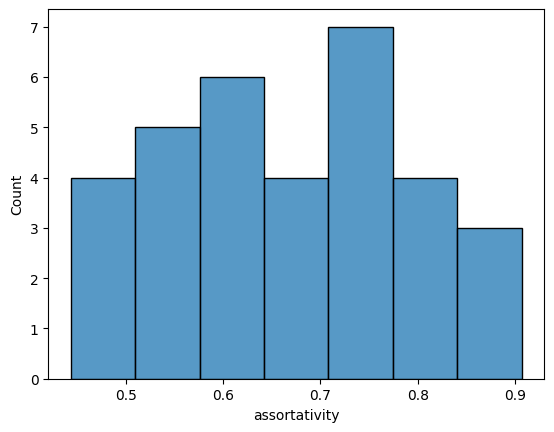

In [162]:
import seaborn as sns
sns.histplot(df['assortativity'])

In [163]:
df

,assortativity,n_comms
0,0.800932,2
1,0.841775,2
2,0.839364,2
3,0.677680,2
4,0.605691,2
5,0.629434,2
6,0.643498,3
7,0.753824,3
8,0.634343,3
9,0.883828,3


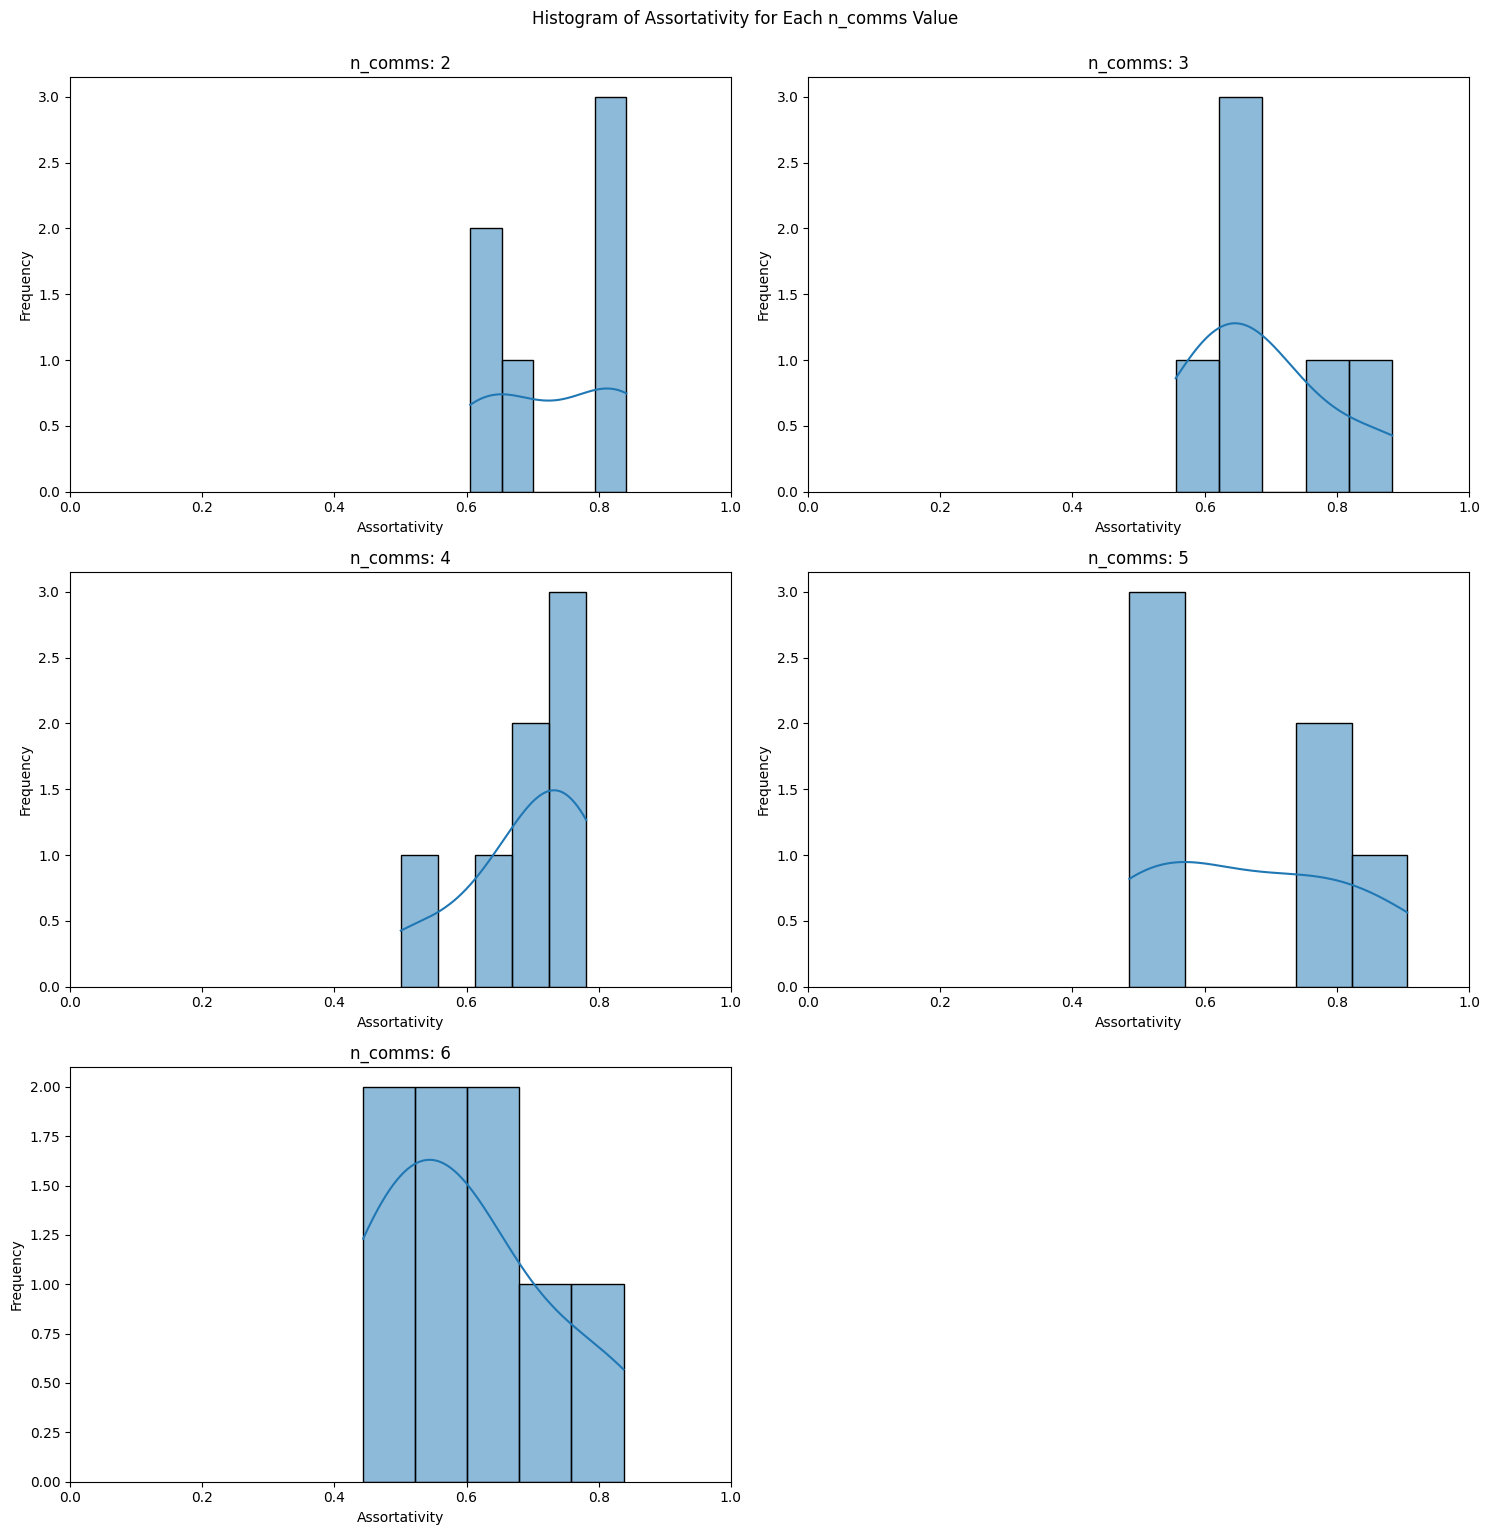

In [164]:
import seaborn as sns
import matplotlib.pyplot as plt

# Get unique values of n_comms
n_comms_values = df['n_comms'].unique()

# Create subplots
num_plots = len(n_comms_values)
fig, axes = plt.subplots(nrows=(num_plots + 1) // 2, ncols=2, figsize=(15, 5 * ((num_plots + 1) // 2)))

axes = axes.flatten()

# Plot each n_comms value in a separate subplot
for ax, n_comms in zip(axes, n_comms_values):
    subset = df[df['n_comms'] == n_comms]
    sns.histplot(subset['assortativity'], ax=ax, kde=True, bins=5)
    ax.set_title(f'n_comms: {n_comms}')
    ax.set_xlabel('Assortativity')
    ax.set_ylabel('Frequency')
    ax.set_xlim(0, 1)  # Set x-axis range between 0 and 1

# Remove any empty subplots
for i in range(len(n_comms_values), len(axes)):
    fig.delaxes(axes[i])

# Adjust layout
plt.tight_layout()
plt.suptitle('Histogram of Assortativity for Each n_comms Value', y=1.02)
plt.show()